## Figure S1

In [1]:
# imports
import eelbrain as eb

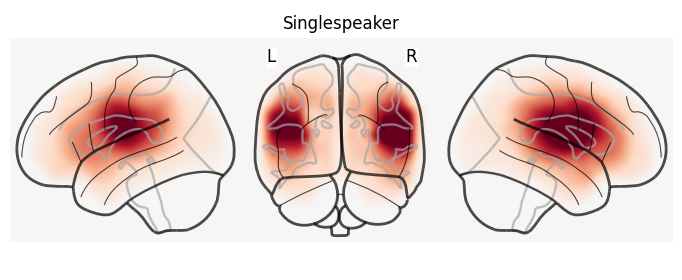

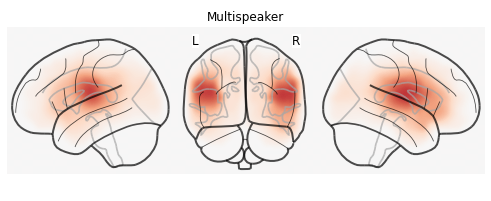

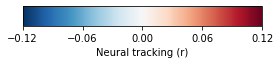

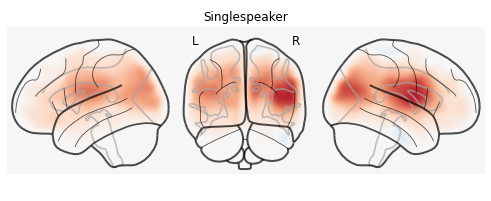

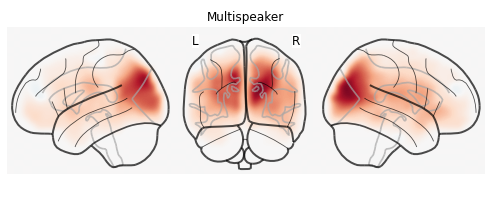

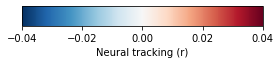

In [2]:
# settings
models = ["acoustic", "lip"]
conditions = ["Singlespeaker", "Multispeaker"]

# plot
for idx_model in models:
    # load data & define colorbar limits
    if idx_model == "lip":
        ds_accs = eb.load.unpickle("./data/prediction_accuracies/accs_lip_whole_brain.pickle")
        limit = 0.04
    else:
        ds_accs = eb.load.unpickle("./data/prediction_accuracies/accs_acoustic_whole_brain.pickle")
        limit = 0.12
        
    # rename labels
    ds_accs["condition"].update_labels({"no_mask_clear": "Singlespeaker", "no_mask_dist": "Multispeaker"})

    # plot 
    for idx_cond in conditions:
        ds_accs_sub = ds_accs.sub(ds_accs['condition'] == idx_cond)
        fig = eb.plot.GlassBrain(ds_accs_sub["acc"], display_mode="lyr", 
                            vmax=limit, title=idx_cond, 
                            cmap="RdBu_r", interpolation="bicubic")
    fig.plot_colorbar(label = "Neural tracking (r)")